# 4) Make histogram of each term

- $\frac{\partial\rho}{\partial \theta} M(\theta)$
- $\frac{\partial\rho}{\partial s} M(S)$
- $M(\rho)$
- $C$
(use logarithmic scale on y-axis)

In [1]:
import xarray as xr
import numpy as np
import dask.array as dsa
import matplotlib.pyplot as plt
from fastjmd95 import jmd95numba
#import pop_tools
import json
import fsspec
import gcsfs
import xmitgcm
from xhistogram.xarray import histogram

In [2]:
from intake import open_catalog
url = "https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/CESM_POP.yaml"
cat = open_catalog(url)
ds_whole  = cat["CESM_POP_hires_control"].to_dask()

In [3]:
with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

In [46]:
tendencies = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/CESM/datasets/tendencies.zarr')).drop(['nlon', 'nlat'])
tendencies

<xarray.Dataset>
Dimensions:    (time: 182, nlat: 2400, nlon: 3600)
Coordinates:
  * time       (time) object 0046-01-02 00:00:00 ... 0046-07-02 00:00:00
Dimensions without coordinates: nlat, nlon
Data variables:
    SSS_bih    (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    SST_bih    (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    cabbeling  (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    drhods     (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    drhodt     (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    rho_bih    (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>

In [5]:
tendencies

<xarray.Dataset>
Dimensions:    (time: 182, nlat: 2400, nlon: 3600)
Coordinates:
  * nlat       (nlat) int64 0 1 2 3 4 5 6 ... 2393 2394 2395 2396 2397 2398 2399
  * nlon       (nlon) int64 0 1 2 3 4 5 6 ... 3593 3594 3595 3596 3597 3598 3599
  * time       (time) object 0046-01-02 00:00:00 ... 0046-07-02 00:00:00
Data variables:
    SSS_bih    (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    SST_bih    (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    cabbeling  (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    drhods     (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    drhodt     (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    rho_bih    (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>

In [38]:
tendencies.nlat.(ds_whole.nlat)

False

In [41]:
ds_whole

<xarray.Dataset>
Dimensions:             (nlat: 2400, nlon: 3600, time: 14965, z_t: 62, z_w: 62,
                         z_t_150m: 15, z_w_bot: 62, z_w_top: 62)
Coordinates: (12/59)
    ANGLE               (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ANGLET              (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DXT                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DXU                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DYT                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    DYU                 (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ...                  ...
    vonkar              float64 ...
  * z_t                 (z_t) float32 500.0 1.5e+03 ... 5.625e+05 5.875e+05
  * z_t_150m            (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * z_w                 (z_w) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
  * z_w_bot             (z_w_bot) float32 1e+03 2e+03 3e+03 ... 5.75e+05 6e+05
  * z_w_top             (z_w_top) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
Dimensions without coordinates: nlat, nlon
Data variables:
    HMXL_2              (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    SFWF_2              (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    SHF_2               (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    SSH_2               (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    SSS                 (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    SST                 (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    TAUX_2              (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    TAUY_2              (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    U1_1                (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    U2_2                (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    V1_1                (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    V2_2                (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
Attributes:
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    calendar:      All years have exactly  365 days.
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    contents:      Diagnostic and Prognostic Variables
    history:       none
    nsteps_total:  13088337
    revision:      $Id: tavg.F90 41939 2012-11-14 16:37:23Z mlevy@ucar.edu $
    source:        CCSM POP2, the CCSM Ocean Component
    start_time:    This dataset was created on 2013-03-09 at 12:25:55.7
    tavg_sum:      86399.99999999962
    title:         hybrid_v5_rel04_BC5_ne120_t12_pop62

In [42]:
tendencies

<xarray.Dataset>
Dimensions:    (time: 182, nlat: 2400, nlon: 3600)
Coordinates:
  * nlat       (nlat) int64 0 1 2 3 4 5 6 ... 2393 2394 2395 2396 2397 2398 2399
  * nlon       (nlon) int64 0 1 2 3 4 5 6 ... 3593 3594 3595 3596 3597 3598 3599
  * time       (time) object 0046-01-02 00:00:00 ... 0046-07-02 00:00:00
Data variables:
    SSS_bih    (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    SST_bih    (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    cabbeling  (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    drhods     (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    drhodt     (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    rho_bih    (time, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>

In [43]:
xr.testing.assert_allclose(ds_whole.nlat.reset_coords(drop=True), tendencies.nlat)

AssertionError: Left and right DataArray objects are not close

Coordinates only on the right object:
  * nlat     (nlat) int64 0 1 2 3 4 5 6 7 ... 2393 2394 2395 2396 2397 2398 2399

In [47]:
ds = tendencies.isel(time=0)

In [7]:
ds

<xarray.Dataset>
Dimensions:    (nlat: 2400, nlon: 3600)
Coordinates:
  * nlat       (nlat) int64 0 1 2 3 4 5 6 ... 2393 2394 2395 2396 2397 2398 2399
  * nlon       (nlon) int64 0 1 2 3 4 5 6 ... 3593 3594 3595 3596 3597 3598 3599
    time       object 0046-01-02 00:00:00
Data variables:
    SSS_bih    (nlat, nlon) float32 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    SST_bih    (nlat, nlon) float32 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    cabbeling  (nlat, nlon) float32 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    drhods     (nlat, nlon) float32 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    drhodt     (nlat, nlon) float32 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    rho_bih    (nlat, nlon) float32 dask.array<chunksize=(2400, 3600), meta=np.ndarray>

### Define Volume

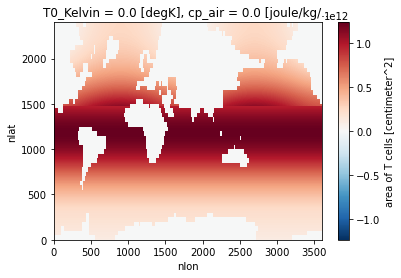

In [8]:
ds_whole.TAREA.plot()

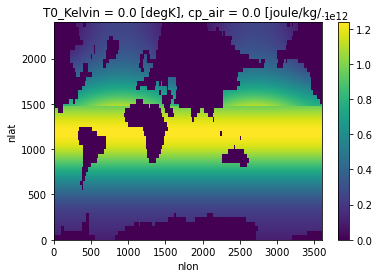

In [9]:
(ds_whole.DXT * ds_whole.DYT).plot()

In [10]:
diff = ds_whole.TAREA - (ds_whole.DXT * ds_whole.DYT)

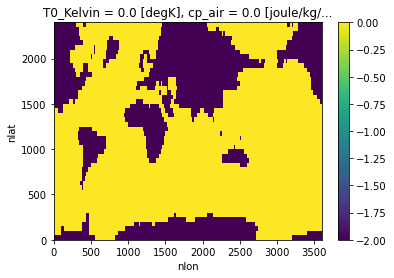

In [11]:
diff.plot()

(-0.001, 0.001)

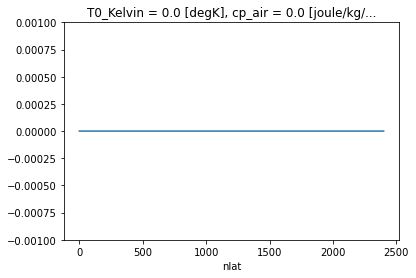

In [12]:
diff.all(dim='nlon').plot()
plt.ylim(-0.001, 0.001)

(-0.001, 0.001)

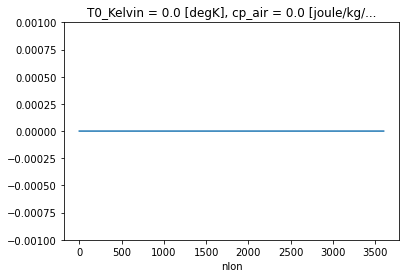

In [13]:
diff.all(dim='nlat').plot()
plt.ylim(-0.001, 0.001)

In [26]:
vol = ds_whole.TAREA

## $\rho$ histogram

In [9]:
sss = ds_whole.SSS.isel(time=0)
sst = ds_whole.SST.isel(time=0)

In [21]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [22]:
rho = xr.apply_ufunc(jmd95numba.rho, sss, sst, 0,
                        output_dtypes=[sst.dtype],
                        dask='parallelized').reset_coords(drop=True)#.load())

In [23]:
rho

<xarray.DataArray (nlat: 2400, nlon: 3600)>
dask.array<transpose, shape=(2400, 3600), dtype=float32, chunksize=(2400, 3600), chunktype=numpy.ndarray>
Dimensions without coordinates: nlat, nlon

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in rho
  return func(*(_execute_task(a, cache) for a in args))


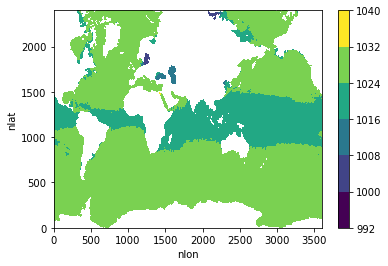

In [24]:
rho.plot.contourf()

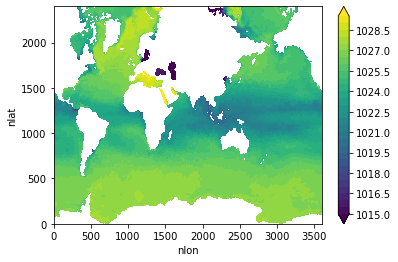

In [13]:
rho.plot.contourf(levels=np.arange(1015, 1030, 0.5))

In [68]:
delta_rho = 0.01
rho_bins = np.arange(1015, 1030, delta_rho)
delta_rho = rho_bins[1] - rho_bins[0]
delta_rho

0.009999999999990905

In [15]:
rho_bins.size

1500

In [16]:
rho.nbytes/1e9

0.03456

In [17]:
dens_dist = histogram(rho.rename('rho0'), bins=[rho_bins],
                         weights=vol, dim=['nlon', 'nlat', 'z_t'])#.load()

## a) $\frac{\partial\rho}{\partial \theta} M(\theta)$

In [18]:
sst_tend = ds.drhodt*ds.SST_bih
sss_tend = ds.drhods*ds.SSS_bih

In [20]:
rho.dtype

dtype('float32')

In [66]:
sst_tend.astype('f4')

<xarray.DataArray (nlat: 2400, nlon: 3600)>
dask.array<mul, shape=(2400, 3600), dtype=float32, chunksize=(2400, 3600), chunktype=numpy.ndarray>
Coordinates:
  * nlat     (nlat) int64 0 1 2 3 4 5 6 7 ... 2393 2394 2395 2396 2397 2398 2399
  * nlon     (nlon) int64 0 1 2 3 4 5 6 7 ... 3593 3594 3595 3596 3597 3598 3599
    time     object 0046-01-02 00:00:00

In [62]:
vol.dtype

dtype('float64')

In [50]:
ds

<xarray.Dataset>
Dimensions:    (nlat: 2400, nlon: 3600)
Coordinates:
    time       object 0046-01-02 00:00:00
Dimensions without coordinates: nlat, nlon
Data variables:
    SSS_bih    (nlat, nlon) float32 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    SST_bih    (nlat, nlon) float32 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    cabbeling  (nlat, nlon) float32 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    drhods     (nlat, nlon) float32 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    drhodt     (nlat, nlon) float32 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    rho_bih    (nlat, nlon) float32 dask.array<chunksize=(2400, 3600), meta=np.ndarray>

In [51]:
histogram(ds.SST_bih.rename('sst_tend'), bins=[rho_bins],
                         weights=vol, dim=['nlat','nlon'])

<xarray.DataArray 'histogram_sst_tend' (sst_tend_bin: 1499)>
dask.array<sum-aggregate, shape=(1499,), dtype=float64, chunksize=(1499,), chunktype=numpy.ndarray>
Coordinates:
  * sst_tend_bin  (sst_tend_bin) float64 1.015e+03 1.015e+03 ... 1.03e+03

In [49]:
xr.align(sst_tend, vol.reset_coords(drop=True), join='exact')

ValueError: indexes along dimension 'nlat' are not equal

In [37]:
sst_tend.nlat.equals(vol.nlat)

False

In [36]:
vol.nlat.equals

<bound method DataArray.equals of <xarray.DataArray 'nlat' (nlat: 2400)>
array([   0,    1,    2, ..., 2397, 2398, 2399])
Coordinates: (12/30)
    T0_Kelvin           float64 ...
    cp_air              float64 ...
    cp_sw               float64 ...
    days_in_norm_year   timedelta64[ns] ...
    fwflux_factor       float64 ...
    grav                float64 ...
    ...                  ...
    salt_to_ppt         float64 ...
    sea_ice_salinity    float64 ...
    sflux_factor        float64 ...
    sound               float64 ...
    stefan_boltzmann    float64 ...
    vonkar              float64 ...
Dimensions without coordinates: nlat>

In [27]:
sst_dist = histogram(sst_tend.rename('sst_tend'), bins=[rho_bins],
                         weights=vol, dim=['nlon', 'nlat']).load()

ValueError: indexes along dimension 'nlat' are not equal

In [52]:
tendency_terms = xr.merge([(ds.SST_bih*ds.drhodt).rename('sst_tend'), (ds.SSS_bih*ds.drhods).rename('sss_tend'),
                           ds.rho_bih.rename('dens_tend'), ds.cabbeling.rename('cabbeling_tend')])

In [53]:
all_tendencies = list(tendency_terms)

In [73]:
def histogram_func(variable):
    """Generalized xhistogram's histogram function 
    for mixing tendency terms"""
    hist = histogram(rho.rename('rho0'), ds_whole.REGION_MASK, bins=[rho_bins, np.arange(-0.5, 11)],
                     weights=variable.fillna(0.), dim=['nlat', 'nlon'])
    return hist / delta_rho

In [ ]:
rho.dims

In [ ]:
tendency_terms.sss_tend.dims

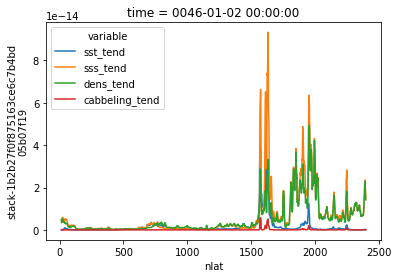

In [78]:
(tendency_terms**2).mean('nlon').to_array().rolling(nlat=10).mean().plot.line(hue='variable')

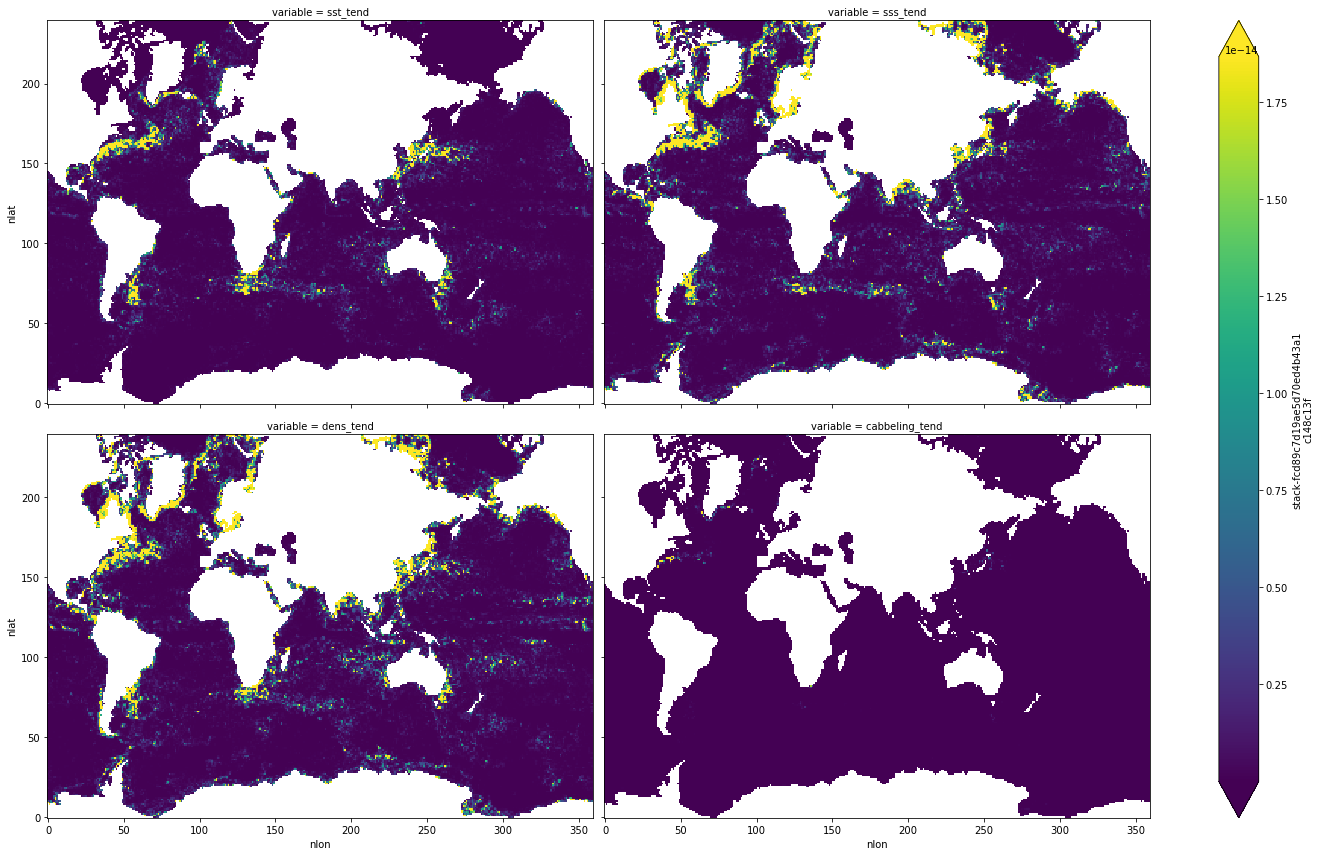

In [82]:
(tendency_terms**2).coarsen(nlon=10, nlat=10).mean().to_array().plot(col='variable', col_wrap=2, robust=True, figsize=(20, 12))

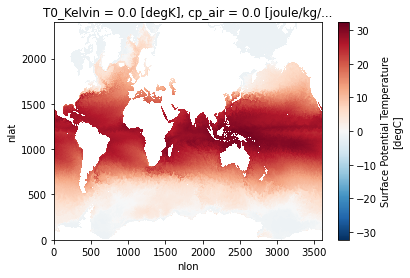

In [83]:
ds_whole.SST[0].plot()

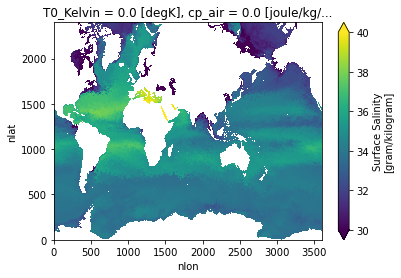

In [85]:
ds_whole.SSS[0].plot(vmin=30, vmax=40)

In [ ]:
histogram_func(tendency_terms.sss_tend)

In [74]:
histograms = xr.merge([histogram_func(tendency_terms[var]).rename('OMEGA_' + var)
                      for var in all_tendencies])

In [75]:
histograms.load()

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in rho
  return func(*(_execute_task(a, cache) for a in args))


<xarray.Dataset>
Dimensions:               (rho0_bin: 1499, REGION_MASK_bin: 11)
Coordinates:
  * rho0_bin              (rho0_bin) float64 1.015e+03 1.015e+03 ... 1.03e+03
  * REGION_MASK_bin       (REGION_MASK_bin) float64 0.0 1.0 2.0 ... 8.0 9.0 10.0
Data variables:
    OMEGA_sst_tend        (rho0_bin, REGION_MASK_bin) float32 0.0 0.0 ... 0.0
    OMEGA_sss_tend        (rho0_bin, REGION_MASK_bin) float32 0.0 0.0 ... 0.0
    OMEGA_dens_tend       (rho0_bin, REGION_MASK_bin) float32 0.0 0.0 ... 0.0
    OMEGA_cabbeling_tend  (rho0_bin, REGION_MASK_bin) float32 0.0 0.0 ... 0.0

In [76]:
histograms.to_array().rolling(rho0_bin=50).mean().plot.line(hue='variable')

ValueError: Line plots are for 1- or 2-dimensional DataArrays. Passed DataArray has 3 dimensions

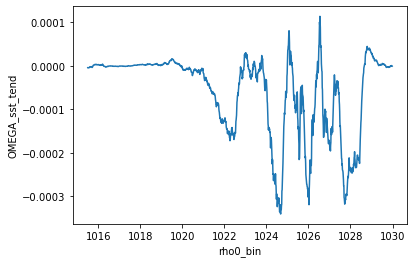

In [65]:
histograms.OMEGA_sst_tend.rolling(rho0_bin=50).mean().plot();

In [64]:
ds.dz * ds.DXT * ds.DYT

AttributeError: 'Dataset' object has no attribute 'dz'

In [ ]:
ds.TAREA.plot(vmin=0, vmax=1)

In [ ]:
(ds.DXT * ds.DYT).plot()

In [ ]:
diff = ds.TAREA - (ds.DXT * ds.DYT)

In [ ]:
diff.plot()

In [ ]:
diff.all(dim='nlon').plot()
plt.ylim(-0.001, 0.001)

In [ ]:
diff.all(dim='nlat').plot()
plt.ylim(-0.001, 0.001)

In [ ]:
ds.dz

In [ ]:
ds.TAREA * ds.dz